In [92]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.optimize import minimize

## Dataset

In [93]:
s = """
# 0       1       2         | 3          4
# Current Voltage Vibration | Error rate Faulty
  0.61     9.9     24.7        0.02     0
  0.38    11.8    254.3        6.24     1
  0.53    14.9     26.2        0.01     0
  0.45    15.9     22.7        0.01     0
  0.63    11.2    312.1        3.12     1
  0.35    12.8    254.7        6.21     1
  0.29    12.2    315.7        5.92     1
  0.39     8.8    244.9        6.31     1
  0.25    19.2     51.2        0.03     0
  0.35    10.1     10.2        0.02     0
  0.47    10.9     25.7        0.03     0
  0.32    15.8    234.1        6.51     1 
"""

D = np.genfromtxt(str.encode(s).splitlines())

In [94]:
d={}
d['x']=D[:,2]
d['y']=D[:,3]

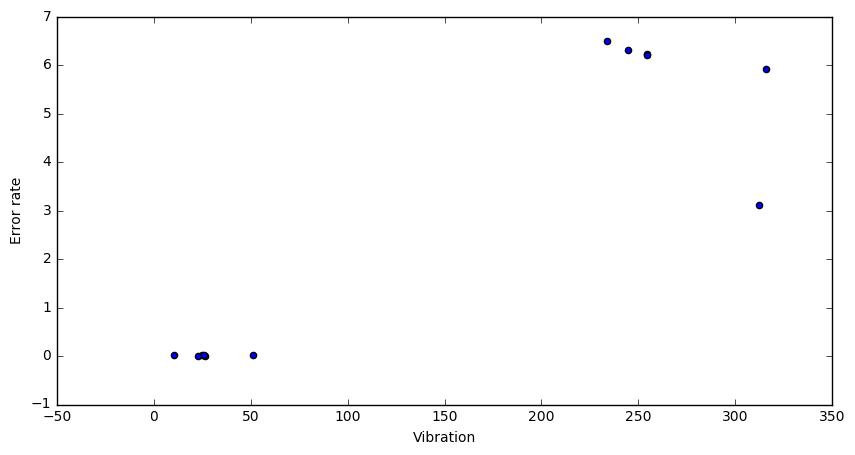

In [95]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])
plt.xlabel("Vibration")
plt.ylabel("Error rate")
# plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-ve.png",transparent=True, bbox_inches="tight")

## Model

In [96]:
def f(x,w): return w[0] + x*w[1]

In [111]:
def dist(a,b):
    return min(1,np.abs(a-b))
    # return np.abs(a-b)
    #if d < 1: return d*d
    #return 1+np.log(d)

In [98]:
def loss(w,d):
    loss = 0
    for i in range(len(d['x'])):
        x = d['x'][i]
        y = d['y'][i]
        loss += dist(f(x,w),y)
    return loss

In [99]:
loss([-3,2],d)

12

## Minimize the Loss using Numerical Optimization

In [109]:
def F(w): return loss(w,d)
M=minimize(F,[-0.01,0.01])

In [110]:
w_hat=M.x
print(w_hat)
print(F(w_hat))

[-0.24592073  0.01076602]
5.47569940015


## Visualize Loss Function

In [107]:
xlim = (-5,5,200)
ylim = (-0.05,0.05,200)
X = np.linspace(*xlim)
Y = np.linspace(*ylim)
Z = np.array([[ F([x,y]) for x in X] for y in Y ])

def rescale(Z):
    z_min = np.percentile(Z,0)
    z_max = np.percentile(Z,80)
    z_range = z_max - z_min
    Z_scaled = (Z-z_min)/z_range
    Z_scaled[Z_scaled > 1] = 1
    return Z_scaled

Z_scaled = rescale(Z)

# left right bottom top
extent = (xlim[0],xlim[1],ylim[1],ylim[0])
x_range = xlim[1]-xlim[0]
y_range = ylim[1]-ylim[0]
aspect = x_range/y_range/2
print(extent)

(-5, 5, 0.05, -0.05)


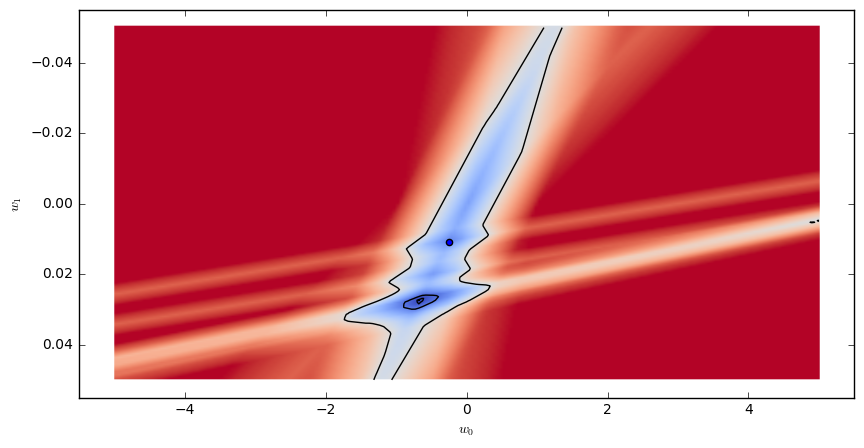

In [108]:
plt.figure(figsize=(10,10))
plt.imshow(Z,cmap=cm.coolwarm,vmin=np.min(Z),vmax=np.percentile(Z,80), extent=extent, aspect=aspect)
plt.contour(X,Y,Z_scaled,[0.0001, 0.001, 0.01, 0.1, 0.5],colors="black")
plt.scatter(*w_hat)
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-vreg.png",transparent=True, bbox_inches="tight")

## Optimal Model

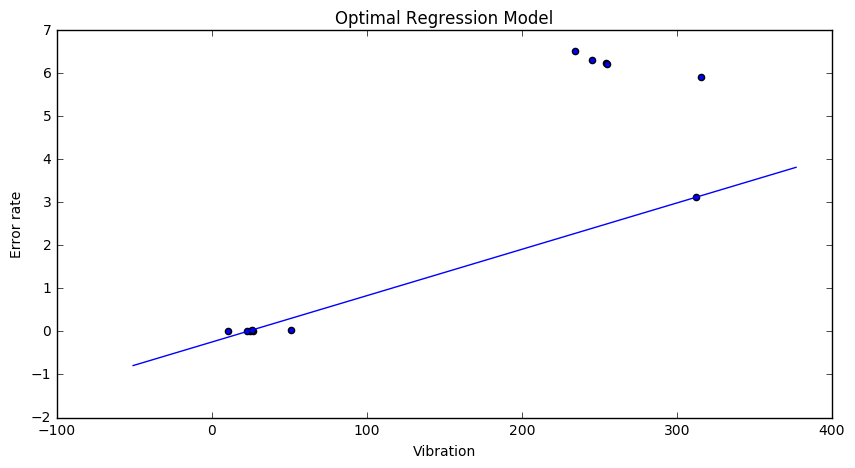

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])
r = np.max(d['x']) - np.min(d['x'])
X = np.linspace(np.min(d['x'])-0.2*r,np.max(d['x'])+0.2*r,100)
Y = [f(x,w_hat) for x in X]
plt.plot(X,Y)
plt.xlabel("Vibration")
plt.ylabel("Error rate")
plt.title("Optimal Regression Model")
plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-vreg-model.png",transparent=True, bbox_inches="tight")